<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/Modelos_Lineales_y_m%C3%A9todos_de_regularizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

In [2]:
import missingno as msno

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [5]:
def metricas(y_true,y_pred):
    r2=r2_score(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    print(f'El r2 score es {r2}')
    print(f'El error cuadrático medio es {mse}')
    print(f'El error medio absoluto es {mae}')

## Regresiones

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
insurance=pd.read_csv('/content/drive/MyDrive/datasets/insurance.csv')

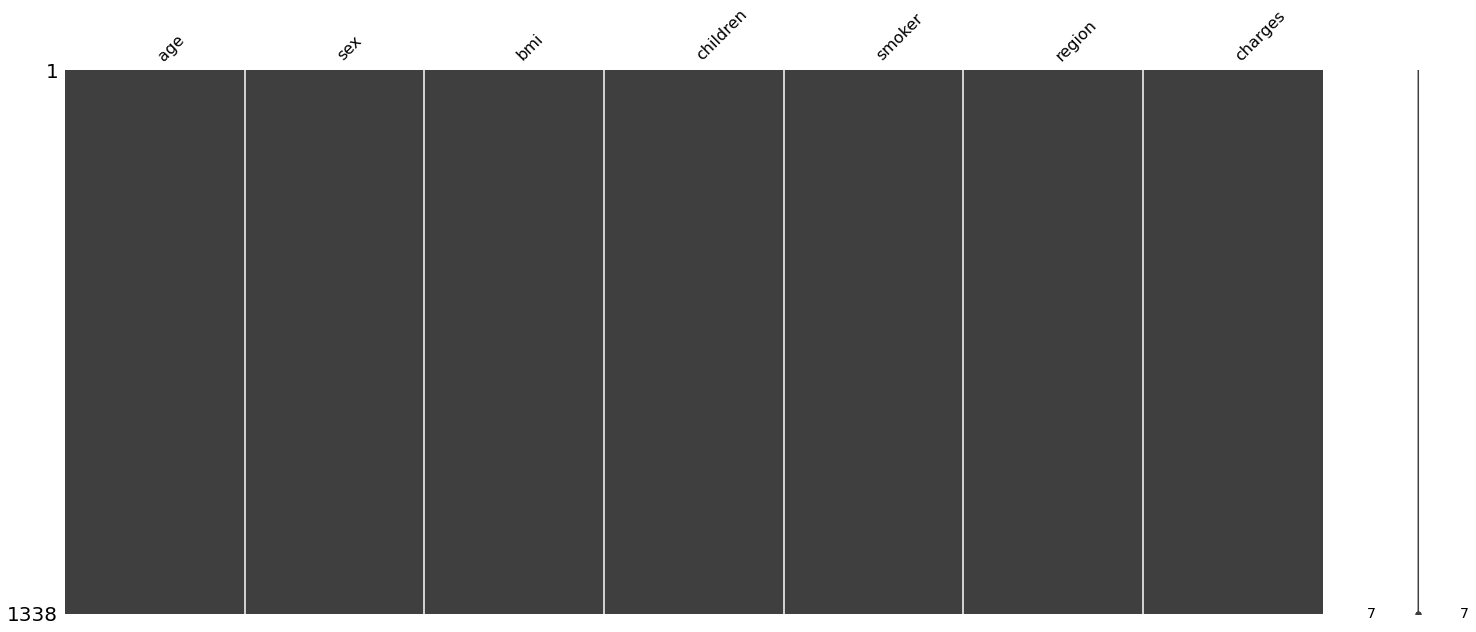

In [8]:
msno.matrix(insurance)

In [9]:
insurance['sex'].value_counts(dropna=False)

male      676
female    662
Name: sex, dtype: int64

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [10]:
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
dumm_insurance=pd.get_dummies(insurance['region'])

In [12]:
insurance['sex']=insurance['sex'].map(lambda x: 1 if x=='female' else 0)

In [13]:
insurance['smoker']=insurance['smoker'].map(lambda x: 1 if x=='yes' else 0)


In [14]:
df= pd.concat([insurance,dumm_insurance],axis=1)

In [15]:
df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,0,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,0,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,0,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,0,28.880,0,0,northwest,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,northeast,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,southeast,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,southwest,2007.94500,0,0,0,1


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
target='charges'

In [18]:
cont=[col for col in df.columns if col not in [target,'region','southwest']]

In [19]:
cont

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'northeast',
 'northwest',
 'southeast']

In [20]:
df=df[cont+[target]].copy()

In [21]:
df.head(3)

,age,sex,bmi,children,smoker,northeast,northwest,southeast,charges
0,19,1,27.90,0,1,0,0,0,16884.9240
1,18,0,33.77,1,0,0,0,1,1725.5523
2,28,0,33.00,3,0,0,0,1,4449.4620


In [22]:
X=df[cont]
y=df[[target]]

In [23]:
X

,age,sex,bmi,children,smoker,northeast,northwest,southeast
0,19,1,27.900,0,1,0,0,0
1,18,0,33.770,1,0,0,0,1
2,28,0,33.000,3,0,0,0,1
3,33,0,22.705,0,0,0,1,0
4,32,0,28.880,0,0,0,1,0
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,1,0
1334,18,1,31.920,0,0,1,0,0
1335,18,1,36.850,0,0,0,0,1
1336,21,1,25.800,0,0,0,0,0


In [24]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [26]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [27]:
sc_X=StandardScaler()

X_train_std=sc_X.fit_transform(X_train)

X_test_std=sc_X.transform(X_test)

## Regresión Lineal

Una forma de poder optimizar el modelo de regresión lineal, es a través del descenso del gradiente.

Usando el **descenso del gradiente** tratamos de encontrar el mínimo global de la función de coste con la cuál estemos evaluando nuestro modelo.

En este caso el descenso del gradiente explora cada punto de la función de costo tratando de encontrar el mínimo global para poder optimizar los pesos/parametros que nos ayuden a minimizar el error de predicción.

La función comunmente utilizada para la regresión lineal es el **RSS (RESIDUAL SUM OF SQUARES)**

<img src="https://i.stack.imgur.com/bmg5Z.png">

Usando esta función es mucho más fácil no atorarnos en un mínimo local y llegar al mínimo global dado que la función es convexa.

El **descenso del gradiente** va iterando para tratar de encontrar el parámetro óptimo $\beta$ en donde encontramos la minimización de la función de costo.

<img src="https://hackernoon.com/hn-images/0*8yzvd7QZLn5T1XWg.jpg
">
<img src="https://www.cs.us.es/~fsancho/images/2017-02/gds.gif">

En el momento en el que encontramos el mínimo actualizamos los parametros "$\beta$" de la regresión asegurando un mejor ajuste.

Matematicamente lo que estamos haciendo es:

**¿Como varia el coste ante un cambio del parametro $\beta$?**

$\frac{\partial C}{\partial \beta}$

<img src="https://sebastianraschka.com/images/faq/closed-form-vs-gd/simple_regression.png
">




REFERENCIAS

https://medium.com/meta-design-ideas/linear-regression-by-using-gradient-descent-algorithm-your-first-step-towards-machine-learning-a9b9c0ec41b1#:~:text=Gradient%20descent%20is%20an%20optimization,a%20cost%20function%20(cost).&text=At%20this%20point%20of%20time,Linear%20Regression%20and%20Gradient%20Descent.


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr=LinearRegression()

In [30]:
lr.fit(X_train_std,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_test

,charges
578,9724.53000
610,8547.69130
569,45702.02235
1034,12950.07120
198,9644.25250
...,...
787,1917.31840
823,8219.20390
1,1725.55230
589,5976.83110


In [32]:
lr.predict(X_test_std)

array([[11015.74241852],
       [ 9500.84490047],
       [37956.97191777],
       [16108.87330766],
       [ 7025.39958707],
       [ 4218.12862892],
       [ 1827.92406235],
       [14363.98494116],
       [ 9061.87495132],
       [ 7506.25393651],
       [ 4884.28157924],
       [10346.79912395],
       [ 8696.46969369],
       [ 3848.10941965],
       [27793.47147473],
       [10787.10256953],
       [11285.21886753],
       [ 6263.00746298],
       [ 8234.13155098],
       [27209.55043213],
       [33591.30661179],
       [14337.91276455],
       [11927.65523358],
       [32054.26214914],
       [ 4075.71677507],
       [ 9358.60925085],
       [ 1428.91094474],
       [ 9825.78280014],
       [ 3806.0184153 ],
       [10409.76003389],
       [ 9074.71148498],
       [39822.39905321],
       [15431.06040808],
       [13624.36330551],
       [24978.59092119],
       [ 5394.35151802],
       [12508.07952242],
       [30461.69954157],
       [33456.53315165],
       [ 3512.5502838 ],


In [33]:
metricas(y_test,lr.predict(X_test_std))

El r2 score es 0.8216781468713605
El error cuadrático medio es 34577221.79775882
El error medio absoluto es 4252.759443161087


In [34]:
y_test

,charges
578,9724.53000
610,8547.69130
569,45702.02235
1034,12950.07120
198,9644.25250
...,...
787,1917.31840
823,8219.20390
1,1725.55230
589,5976.83110


In [35]:
predicciones=y_test.copy()
predicciones['lr']=lr.predict(X_test_std)

In [36]:
predicciones.reset_index(drop=True,inplace=True)

In [37]:
predicciones

,charges,lr
0,9724.53000,11015.742419
1,8547.69130,9500.844900
2,45702.02235,37956.971918
3,12950.07120,16108.873308
4,9644.25250,7025.399587
...,...,...
129,1917.31840,5476.557031
130,8219.20390,9343.098558
131,1725.55230,3521.492556
132,5976.83110,7648.806297


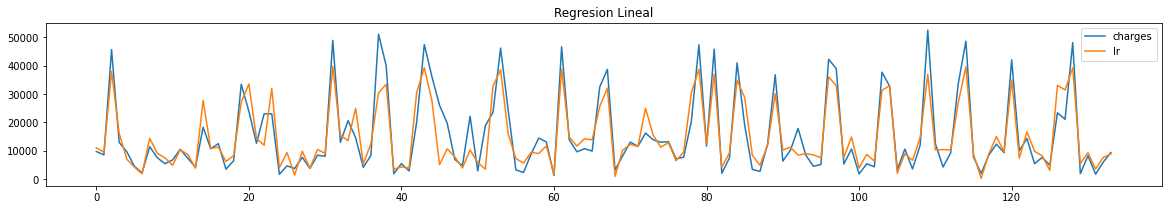

In [38]:
predicciones.plot(figsize=(20,3),title="Regresion Lineal")

## LASSO

In [39]:
from sklearn.linear_model import Lasso

In [40]:
lasso=Lasso()

In [41]:
lasso.fit(X_train_std,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
lasso.predict(X_test_std)

array([11018.58829364,  9502.65066987, 37949.82195707, 16106.12718775,
        7025.99207283,  4221.07299764,  1828.33891119, 14357.66127947,
        9057.77021432,  7504.50641783,  4883.19890998, 10343.82858491,
        8697.69053477,  3852.7224953 , 27792.03300405, 10787.42730916,
       11285.97313341,  6262.85423412,  8233.25400154, 27208.01368954,
       33587.859106  , 14332.75387591, 11925.10746338, 32054.29387221,
        4080.7950274 ,  9356.94292609,  1430.99519692,  9825.46388479,
        3810.38952322, 10408.19994027,  9070.87077482, 39819.89684794,
       15432.4063261 , 13626.11357789, 24977.14164247,  5393.71936693,
       12509.16219474, 30461.36920462, 33449.53970114,  3514.99324649,
        4291.33297379,  3960.99665682, 30634.10750031, 39311.29500641,
       27635.38020263,  5093.41520806, 10680.24180002,  7831.51910434,
        3908.55644926, 10285.971579  ,  5872.42679084,  3502.58242655,
       32801.04590698, 38564.3860023 , 15904.3268788 ,  7267.4147611 ,
      

In [43]:
metricas(y_test,lasso.predict(X_test_std))

El r2 score es 0.8216486454782694
El error cuadrático medio es 34582942.219537504
El error medio absoluto es 4252.9445377862


In [45]:
lasso.coef_

array([3570.43137123,   28.5795501 , 1982.59206499,  553.44189063,
       9377.78936507,  466.71740074,  259.09712729,  -16.28113175])

In [46]:
predicciones['lasso']=lasso.predict(X_test_std)

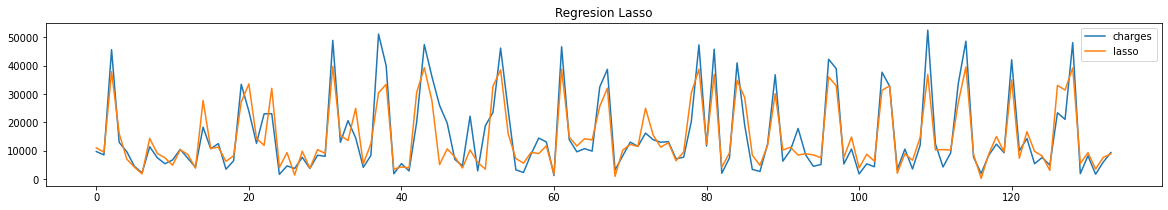

In [47]:
predicciones[['charges','lasso']].plot(figsize=(20,3),title="Regresion Lasso")

## Ridge

In [48]:
from sklearn.linear_model import Ridge

In [49]:
ridge=Ridge()

In [50]:
ridge.fit(X_train_std,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [51]:
ridge.predict(X_test_std)

array([[11017.89782873],
       [ 9504.92338135],
       [37934.91267164],
       [16105.14984935],
       [ 7028.9885894 ],
       [ 4225.48700721],
       [ 1836.40060436],
       [14361.59057556],
       [ 9064.04765996],
       [ 7510.45225994],
       [ 4890.97050261],
       [10347.80699849],
       [ 8699.81281309],
       [ 3856.82689628],
       [27779.78694641],
       [10790.52498766],
       [11285.85757182],
       [ 6268.58278746],
       [ 8237.5753083 ],
       [27197.06058691],
       [33573.2700947 ],
       [14335.41036385],
       [11927.60896324],
       [32038.93077793],
       [ 4084.76361323],
       [ 9361.48768908],
       [ 1437.94129769],
       [ 9829.88699098],
       [ 3814.73584512],
       [10411.36165111],
       [ 9076.91081212],
       [39801.21562413],
       [15429.16938508],
       [13623.97932407],
       [24967.45737678],
       [ 5399.81835874],
       [12510.3814434 ],
       [30447.03566704],
       [33437.66189599],
       [ 3519.93432525],


In [52]:
metricas(y_test,ridge.predict(X_test_std))

El r2 score es 0.8215376397403856
El error cuadrático medio es 34604466.61462589
El error medio absoluto es 4254.979179135932


In [53]:
predicciones['ridge']=ridge.predict(X_test_std)

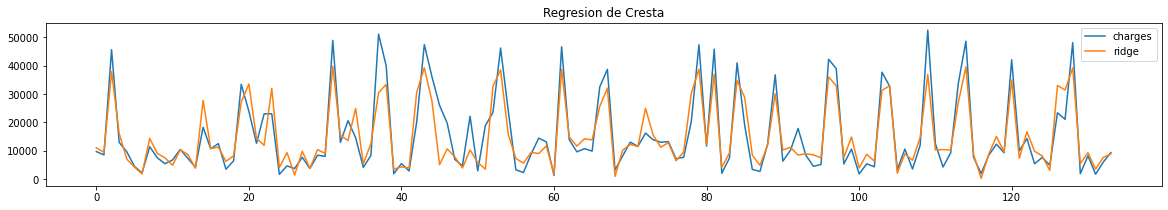

In [54]:
predicciones[['charges','ridge']].plot(figsize=(20,3),title="Regresion de Cresta")

## Elastic Net

In [55]:
from sklearn.linear_model import ElasticNet

In [56]:
elastic=ElasticNet(alpha=.5)

In [57]:
elastic.fit(X_train_std,y_train)

ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
elastic.predict(X_test_std)

array([11505.38680112, 10431.52155118, 32719.10780574, 15268.174786  ,
        7926.15577876,  5972.32147625,  3903.93964369, 13846.14653323,
        9628.10412005,  8527.02178812,  6477.70135874, 10629.53601245,
        9509.00720562,  5893.2557105 , 24560.64178985, 11536.37389564,
       11455.46364969,  7610.38199379,  9077.00956423, 24242.20426402,
       29277.30929487, 13795.99136934, 11959.7564942 , 28346.37725195,
        6191.70304109, 10069.43075121,  3611.55465649, 10754.1684586 ,
        5855.4432434 , 10811.60988897,  9642.80711566, 34694.87973104,
       14975.10002345, 13531.93581137, 22345.24571857,  6748.60402217,
       12989.50683963, 26951.72750366, 29002.00478449,  5320.54837151,
        5890.1597614 ,  6112.20985395, 26991.96914103, 33817.14268646,
       24790.01360689,  6415.83628948, 11451.63916685,  8726.78293034,
        5615.85012427, 11072.50244023,  7111.83016481,  5195.19940293,
       28844.80641669, 33269.21312393, 15474.89489445,  8367.54559103,
      

In [59]:
metricas(y_test,elastic.predict(X_test_std))

El r2 score es 0.7597692011841287
El error cuadrático medio es 46581579.697452605
El error medio absoluto es 4994.511167989137


In [60]:
predicciones['elastic']=elastic.predict(X_test_std)

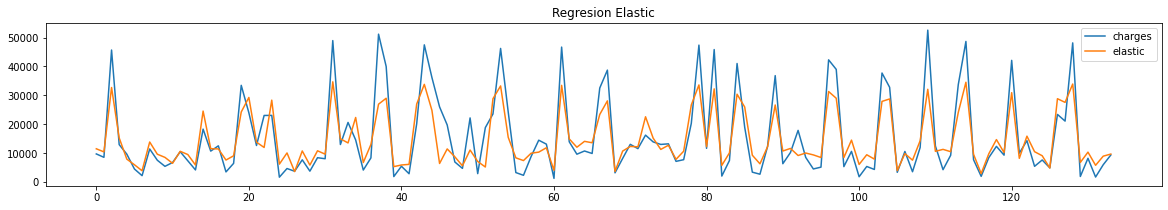

In [61]:
predicciones[['charges','elastic']].plot(figsize=(20,3),title="Regresion Elastic")

## LARS  

El modelo LARS es un algoritmo que va introduciendo una a una variables al modelo de acuerdo a su poder explicativo sobre la información de **Y** que aún no es explicada y va modificando los parámetros de los coeficientes asociados $B_{j}$ de manera equitativa a su relevancia.

# STEPS

1.- Estandarizar para asignar medio cero y varianza 1

2.- Calcular el residual $r = y - \hat{y}$ (iniciando con $r = y - \hat{y}$ de un modelo sin regresores es decir donde $\beta_{1},...,\beta_{n}=0$)

3.-Encontrar las variables $X_{j}$ más correlacionadas con r

4.- Mover $\beta_{j}$ de 0 hacia $\beta_{j}^{ols} = (x_{j},r)$ hasta que otra variable $x_{k}$ tenga tanta corrleación con el residual actual $r$ como $x_{j}$ la tiene

5.-Mover $\beta_{j}$ y $\beta_{k}$ de forma paralela en la dirección de los estimadores conjuntos ($\hat{\beta_{j}^{ols}},\hat{\beta_{k}^{ols}}$) sobre el error actual $r$ como $\beta_{j}x_{j}$ + $\beta_{k}x_{k}$ la tiene

6.-Continuar hasta que todos los p regresores entren al modelo 


In [62]:
from sklearn.linear_model import Lars

In [63]:
lars=Lars()

In [64]:
lars.fit(X_train_std,y_train)

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True, fit_path=True,
     n_nonzero_coefs=500, normalize=True, precompute='auto', verbose=False)

In [65]:
lars.predict(X_test_std)

array([11015.74241852,  9500.84490047, 37956.97191777, 16108.87330766,
        7025.39958707,  4218.12862892,  1827.92406235, 14363.98494116,
        9061.87495132,  7506.25393651,  4884.28157924, 10346.79912395,
        8696.46969369,  3848.10941965, 27793.47147473, 10787.10256953,
       11285.21886753,  6263.00746298,  8234.13155098, 27209.55043213,
       33591.30661179, 14337.91276455, 11927.65523358, 32054.26214914,
        4075.71677507,  9358.60925085,  1428.91094474,  9825.78280014,
        3806.0184153 , 10409.76003389,  9074.71148498, 39822.39905321,
       15431.06040808, 13624.36330551, 24978.59092119,  5394.35151802,
       12508.07952242, 30461.69954157, 33456.53315165,  3512.5502838 ,
        4290.31151379,  3954.86930897, 30635.62744125, 39318.10278656,
       27635.98565158,  5096.39546015, 10679.836177  ,  7831.08447883,
        3908.5290758 , 10283.38734898,  5874.37887424,  3505.0973271 ,
       32800.40266346, 38573.77413439, 15905.38417016,  7267.59093391,
      

In [66]:
metricas(y_test,lars.predict(X_test_std))

El r2 score es 0.8216781468713611
El error cuadrático medio es 34577221.797758706
El error medio absoluto es 4252.759443161074


In [67]:
predicciones['lars']=lars.predict(X_test_std)

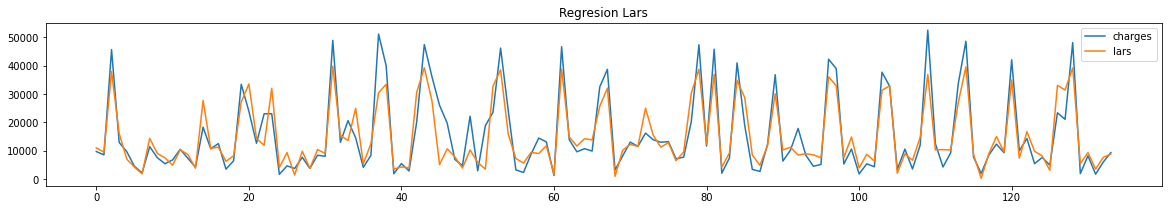

In [68]:
predicciones[['charges','lars']].plot(figsize=(20,3),title="Regresion Lars")

## Regresión Bayesiana

In [ ]:
from sklearn.linear_model import BayesianRidge

In [ ]:
bayesian_ridge=BayesianRidge()

In [ ]:
y_train

,charges
461,22144.0320
322,35491.6400
224,19515.5416
711,10107.2206
58,23244.7902
...,...
763,3070.8087
835,7160.3303
1216,5415.6612
559,1646.4297


In [ ]:
bayesian_ridge.fit(X_train_std,y_train[target])

BayesianRidge()

In [ ]:
bayesian_ridge.predict(X_test_std)

array([11021.80412795,  9512.31579935, 37894.91162091, 16098.40186049,
        7035.50047878,  4238.83080699,  1851.77727256, 14357.25334788,
        9067.99199386,  7518.06750495,  4903.10010634, 10349.63823974,
        8705.87649731,  3872.63251139, 27754.97338753, 10796.7254181 ,
       11287.01705003,  6278.69519021,  8243.82225466, 27174.41205597,
       33540.56033901, 14330.87723966, 11927.52890198, 32011.12344402,
        4101.1662436 ,  9366.71014802,  1454.31964205,  9837.32547467,
        3830.54181761, 10414.26782183,  9080.90295487, 39762.79418331,
       15425.73958966, 13623.28287468, 24947.2689607 ,  5409.73671994,
       12514.5502409 , 30420.44237189, 33403.44389786,  3533.32907472,
        4308.83892857,  3981.00278809, 30592.75489266, 39253.10124557,
       27602.57983486,  5111.09334281, 10689.7330646 ,  7841.38071748,
        3928.34877879, 10293.39515361,  5888.16245005,  3524.39195353,
       32754.24290263, 38511.08312398, 15900.44418506,  7280.18082777,
      

In [ ]:
metricas(y_test,bayesian_ridge.predict(X_test_std))

El r2 score es 0.8212802958850786
El error cuadrático medio es 34654366.474946566
El error medio absoluto es 4259.0048352950425


In [ ]:
predicciones['bayesiana']=bayesian_ridge.predict(X_test_std)

<AxesSubplot:title={'center':'Regresion Bayesiana'}>

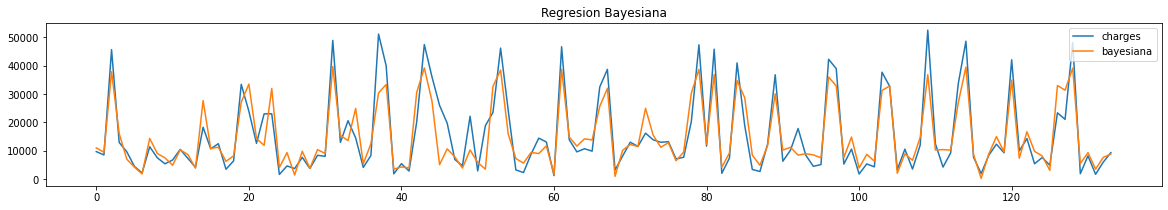

In [ ]:
predicciones[['charges','bayesiana']].plot(figsize=(20,3),title="Regresion Bayesiana")

<AxesSubplot:title={'center':'Desempeño Modelos'}>

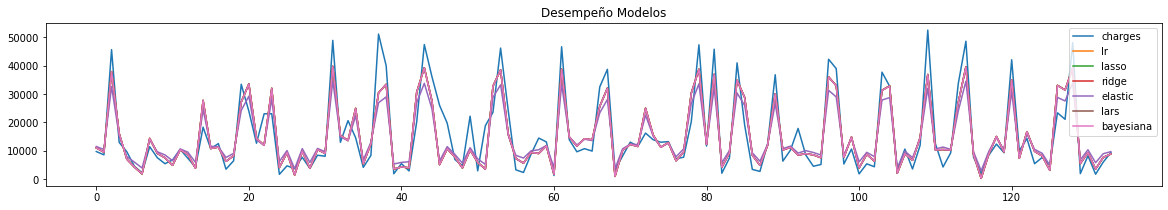

In [ ]:
predicciones.plot(figsize=(20,3),title="Desempeño Modelos")